# Preface

Objectives:
1. Learn to use the `keras` API
2. Explore how performance of fully connected neural networks depend on its hyper-parameters
3. Explore the effect of learning rate and batch size on training and testing performance

Due: 4 Feb 2023

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=1.5)
from tensorflow.keras.layers import Dense
import numpy as np
import sklearn
import time
from sklearn.metrics import classification_report

# The Fashion MNIST Dataset

As mentioned in class the saying,
> *If you model works for MNIST, it may not work for anything else, but if it doesn't work for MNIST, it won't work for anything else*

Here in this notebook you will go beyond the MNIST dataset, albeit only a little bit. We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is designed to replace MNIST as the new minimal dataset to test vision tasks. 

It is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Thus, it is almost exactly like the MNIST dataset for digit recognition, but the classification problem is generally harder.


Here are some example images:
![Fashion MNIST](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

# Importing the Dataset

Just like MNIST, this dataset is found in the `tf.keras.datasets` module.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

The following is a dictionary of labels that will map the y_train/y_test labels into words

In [3]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
labels_train = [label_dict[u] for u in y_train]
labels_test = [label_dict[u] for u in y_test]

Text(0.5, 1.0, 'Label = Ankle boot')

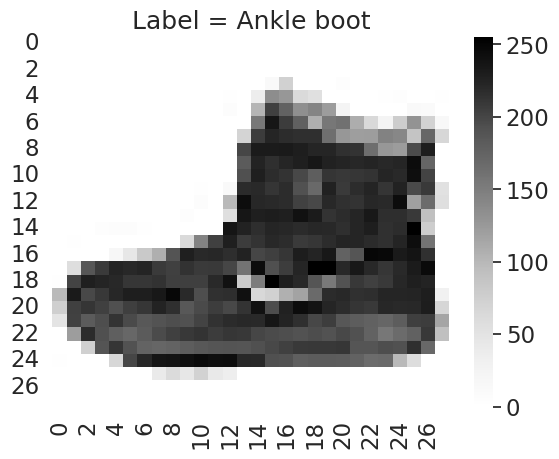

In [4]:
ax = sns.heatmap(x_train[0], cmap='Greys')
ax.set_title(f'Label = {labels_train[0]}')

# Task 1: Build a Shallow NN for Classification

Build and train a shallow (one-hidden-layer) neural network with 128 hidden nodes to classify these images. Remember to perform appropriate preprocessing steps, such as normalization and one-hot representations.

Evaluate carefully the performance of your training and the final model's performance. Discuss any interesting phenomena you discover.

## 1.1 Normalize Data

In [5]:
xtrain = x_train.reshape((-1, 28*28)) / 255.0
xtest = x_test.reshape((-1, 28*28)) / 255.0

In [6]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

## 1.2 Build Model

In [7]:
model = tf.keras.Sequential([
    Dense(units = 128, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(xtrain,
                    ytrain,
                    epochs = 200, 
                    batch_size = 512,
                    validation_data = (xtest, ytest),
                    verbose = 2)

Epoch 1/200
118/118 - 1s - loss: 1.6083 - accuracy: 0.5207 - val_loss: 1.2039 - val_accuracy: 0.6490 - 550ms/epoch - 5ms/step
Epoch 2/200
118/118 - 0s - loss: 1.0465 - accuracy: 0.6817 - val_loss: 0.9567 - val_accuracy: 0.6834 - 332ms/epoch - 3ms/step
Epoch 3/200
118/118 - 0s - loss: 0.8785 - accuracy: 0.7219 - val_loss: 0.8439 - val_accuracy: 0.7270 - 328ms/epoch - 3ms/step
Epoch 4/200
118/118 - 0s - loss: 0.7931 - accuracy: 0.7472 - val_loss: 0.7793 - val_accuracy: 0.7455 - 330ms/epoch - 3ms/step
Epoch 5/200
118/118 - 0s - loss: 0.7385 - accuracy: 0.7628 - val_loss: 0.7367 - val_accuracy: 0.7570 - 325ms/epoch - 3ms/step
Epoch 6/200
118/118 - 0s - loss: 0.6994 - accuracy: 0.7742 - val_loss: 0.7022 - val_accuracy: 0.7662 - 325ms/epoch - 3ms/step
Epoch 7/200
118/118 - 0s - loss: 0.6691 - accuracy: 0.7830 - val_loss: 0.6773 - val_accuracy: 0.7760 - 325ms/epoch - 3ms/step
Epoch 8/200
118/118 - 0s - loss: 0.6448 - accuracy: 0.7915 - val_loss: 0.6544 - val_accuracy: 0.7860 - 326ms/epoch - 3

Epoch 66/200
118/118 - 0s - loss: 0.4196 - accuracy: 0.8561 - val_loss: 0.4611 - val_accuracy: 0.8378 - 324ms/epoch - 3ms/step
Epoch 67/200
118/118 - 0s - loss: 0.4184 - accuracy: 0.8569 - val_loss: 0.4543 - val_accuracy: 0.8404 - 325ms/epoch - 3ms/step
Epoch 68/200
118/118 - 0s - loss: 0.4175 - accuracy: 0.8569 - val_loss: 0.4657 - val_accuracy: 0.8334 - 323ms/epoch - 3ms/step
Epoch 69/200
118/118 - 0s - loss: 0.4164 - accuracy: 0.8574 - val_loss: 0.4541 - val_accuracy: 0.8390 - 325ms/epoch - 3ms/step
Epoch 70/200
118/118 - 0s - loss: 0.4153 - accuracy: 0.8579 - val_loss: 0.4615 - val_accuracy: 0.8337 - 325ms/epoch - 3ms/step
Epoch 71/200
118/118 - 0s - loss: 0.4143 - accuracy: 0.8584 - val_loss: 0.4509 - val_accuracy: 0.8417 - 323ms/epoch - 3ms/step
Epoch 72/200
118/118 - 0s - loss: 0.4134 - accuracy: 0.8589 - val_loss: 0.4505 - val_accuracy: 0.8413 - 323ms/epoch - 3ms/step
Epoch 73/200
118/118 - 0s - loss: 0.4127 - accuracy: 0.8586 - val_loss: 0.4502 - val_accuracy: 0.8427 - 325ms/e

Epoch 131/200
118/118 - 0s - loss: 0.3716 - accuracy: 0.8719 - val_loss: 0.4161 - val_accuracy: 0.8519 - 325ms/epoch - 3ms/step
Epoch 132/200
118/118 - 0s - loss: 0.3715 - accuracy: 0.8721 - val_loss: 0.4160 - val_accuracy: 0.8517 - 324ms/epoch - 3ms/step
Epoch 133/200
118/118 - 0s - loss: 0.3706 - accuracy: 0.8718 - val_loss: 0.4147 - val_accuracy: 0.8513 - 325ms/epoch - 3ms/step
Epoch 134/200
118/118 - 0s - loss: 0.3701 - accuracy: 0.8723 - val_loss: 0.4233 - val_accuracy: 0.8466 - 324ms/epoch - 3ms/step
Epoch 135/200
118/118 - 0s - loss: 0.3700 - accuracy: 0.8724 - val_loss: 0.4152 - val_accuracy: 0.8521 - 325ms/epoch - 3ms/step
Epoch 136/200
118/118 - 0s - loss: 0.3689 - accuracy: 0.8729 - val_loss: 0.4201 - val_accuracy: 0.8470 - 322ms/epoch - 3ms/step
Epoch 137/200
118/118 - 0s - loss: 0.3687 - accuracy: 0.8735 - val_loss: 0.4129 - val_accuracy: 0.8542 - 324ms/epoch - 3ms/step
Epoch 138/200
118/118 - 0s - loss: 0.3681 - accuracy: 0.8736 - val_loss: 0.4117 - val_accuracy: 0.8537 -

118/118 - 0s - loss: 0.3437 - accuracy: 0.8814 - val_loss: 0.3936 - val_accuracy: 0.8630 - 327ms/epoch - 3ms/step
Epoch 196/200
118/118 - 0s - loss: 0.3435 - accuracy: 0.8808 - val_loss: 0.3932 - val_accuracy: 0.8623 - 325ms/epoch - 3ms/step
Epoch 197/200
118/118 - 0s - loss: 0.3431 - accuracy: 0.8814 - val_loss: 0.3940 - val_accuracy: 0.8625 - 328ms/epoch - 3ms/step
Epoch 198/200
118/118 - 0s - loss: 0.3427 - accuracy: 0.8818 - val_loss: 0.3935 - val_accuracy: 0.8610 - 325ms/epoch - 3ms/step
Epoch 199/200
118/118 - 0s - loss: 0.3422 - accuracy: 0.8818 - val_loss: 0.3918 - val_accuracy: 0.8618 - 324ms/epoch - 3ms/step
Epoch 200/200
118/118 - 0s - loss: 0.3419 - accuracy: 0.8824 - val_loss: 0.3944 - val_accuracy: 0.8614 - 323ms/epoch - 3ms/step


In [9]:
history = pd.DataFrame(history.history)

In [10]:
history

,loss,accuracy,val_loss,val_accuracy
0,1.608299,0.520733,1.203941,0.6490
1,1.046512,0.681700,0.956714,0.6834
2,0.878508,0.721950,0.843886,0.7270
3,0.793057,0.747183,0.779347,0.7455
4,0.738546,0.762800,0.736716,0.7570
...,...,...,...,...
195,0.343488,0.880800,0.393201,0.8623
196,0.343086,0.881400,0.394004,0.8625
197,0.342690,0.881783,0.393460,0.8610
198,0.342173,0.881783,0.391831,0.8618


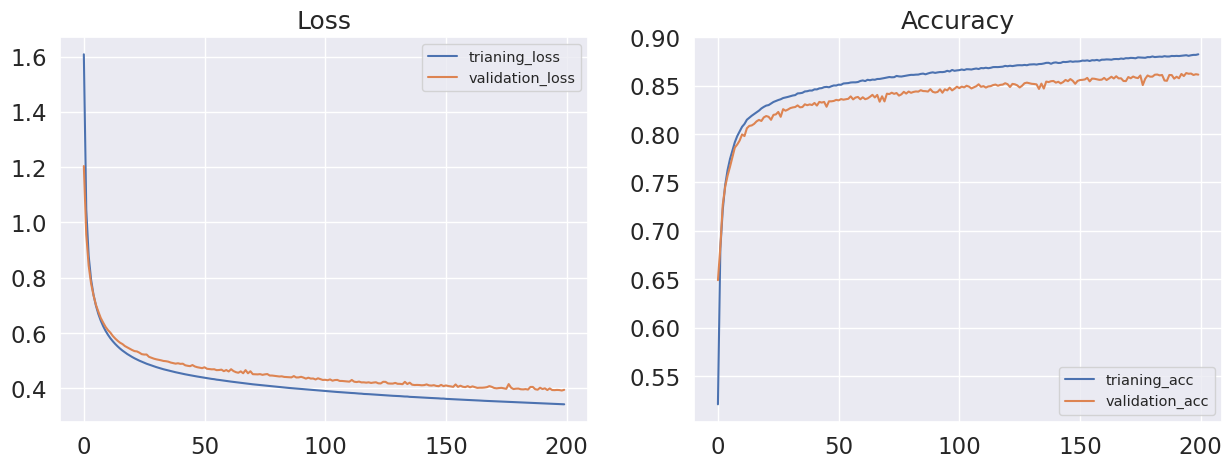

In [11]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1, title = 'Loss')
plt.plot(history.loss, label = 'trianing_loss')
plt.plot(history.val_loss,label = 'validation_loss')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.subplot(1, 2, 2, title = 'Accuracy')
plt.plot(history.accuracy, label = 'trianing_acc')
plt.plot(history.val_accuracy,label = 'validation_acc')
plt.legend(loc = 'lower right', fontsize = 'xx-small')

In [12]:
y_test_predict = model.predict(xtest)
print(classification_report(y_true=ytest.argmax(1), y_pred=y_test_predict.argmax(1)))

313/313 [==============================] - 0s 540us/step
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.81      0.72      0.76      1000
           3       0.83      0.89      0.86      1000
           4       0.76      0.80      0.78      1000
           5       0.95      0.94      0.95      1000
           6       0.66      0.65      0.65      1000
           7       0.91      0.94      0.93      1000
           8       0.94      0.95      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## 1.3 Findings
From the above classification report, we find that some classes has very high precision, recall and f1-score (such as class 1 and class 5) while some classes do not.

<AxesSubplot:>

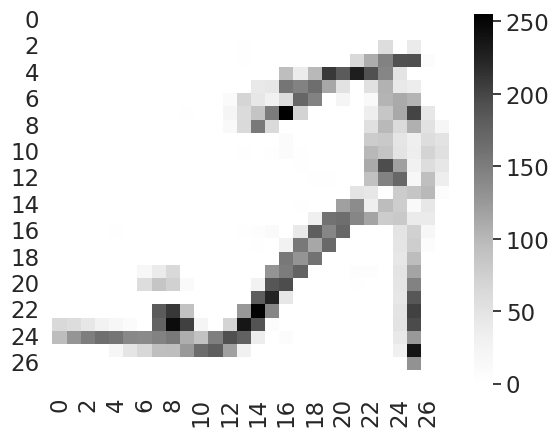

In [13]:
class_1 = np.where(y_train == 5)[0][0]
sns.heatmap(x_train[class_1], cmap = 'Greys')

<AxesSubplot:>

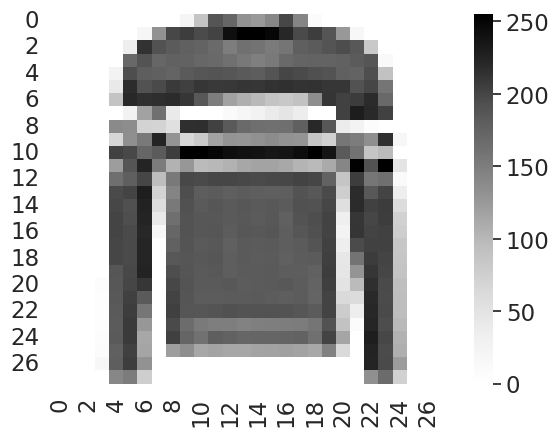

In [14]:
class_2 = np.where(y_train == 2)[0][0]
sns.heatmap(x_train[class_2], cmap = 'Greys')

By printing some examples of these classes out, there is a claer explanation for the observed performance:
* for class1 which has high performance, the shape of the image are relatively simple, only a few lines
* while for class2 which has poor performance, the shape is much more complex

# Task 2: Dependence on Hyper-parameters

Now, investigate the dependence of the neural network's performance on some hyper-parameters. In particular, you should investigate the dependence on the following:

1. Number of hidden nodes
2. The activation function
3. Loss functions

Discuss any interesting findings and insights.

## 2.1 Hyper-Parameters Tuning: Number of hidden nodes

### 2.1.1 Build Models

total used time for model training with 16 is 30.951175928115845s!
Best performance with 16 is 0.8438000082969666


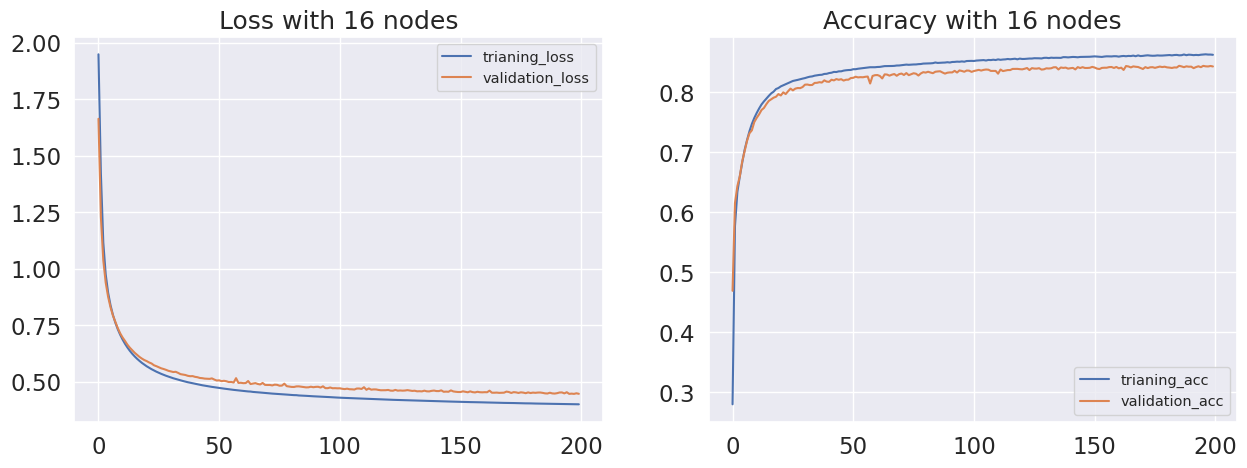

total used time for model training with 32 is 37.09783697128296s!
Best performance with 32 is 0.8587999939918518


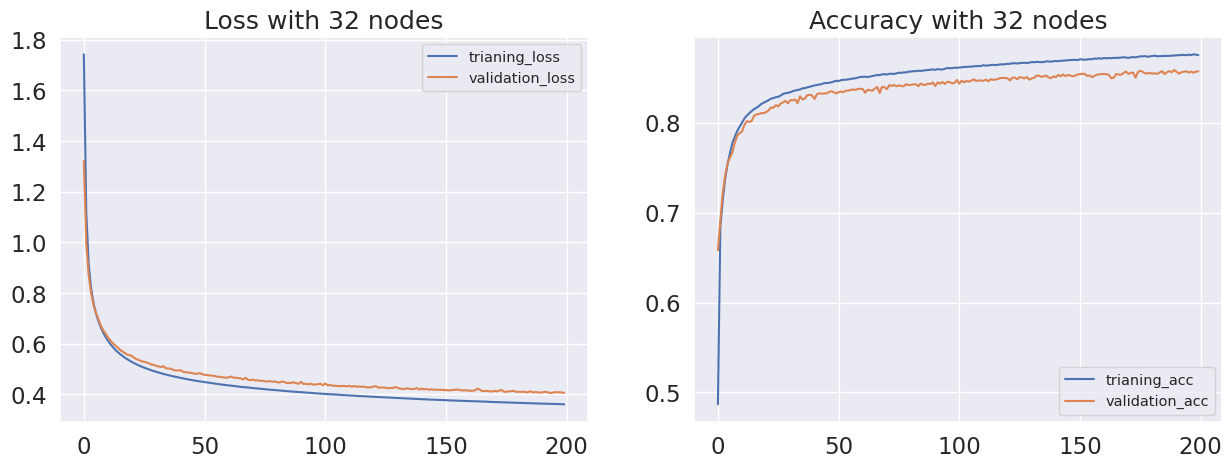

total used time for model training with 64 is 46.599337577819824s!
Best performance with 64 is 0.8621000051498413


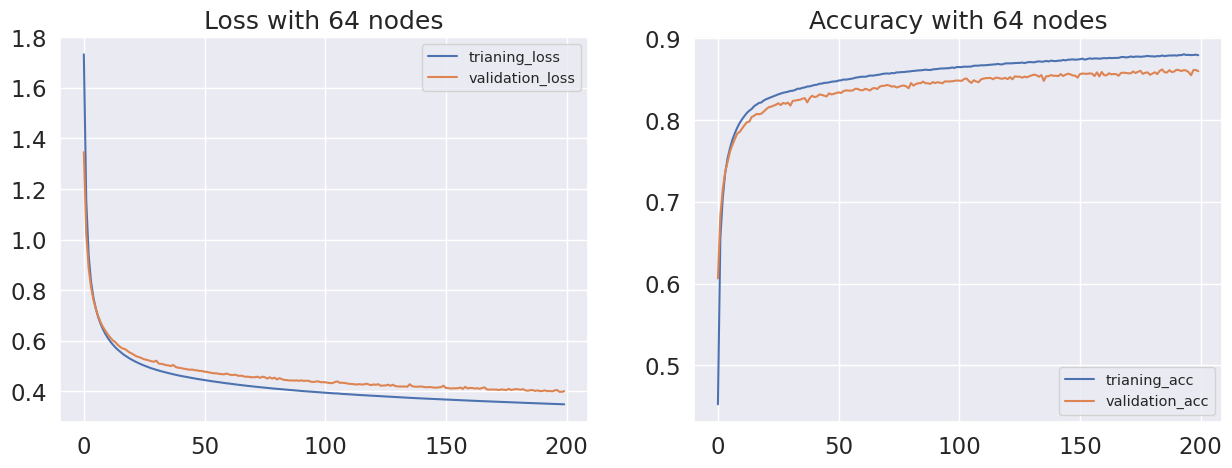

total used time for model training with 128 is 65.68356776237488s!
Best performance with 128 is 0.8611999750137329


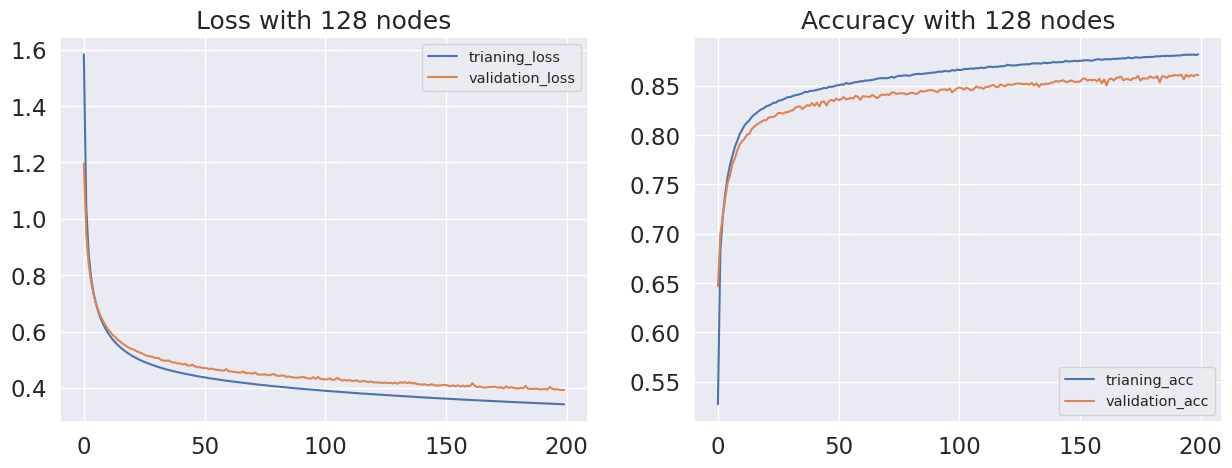

total used time for model training with 256 is 97.5353090763092s!
Best performance with 256 is 0.8636000156402588


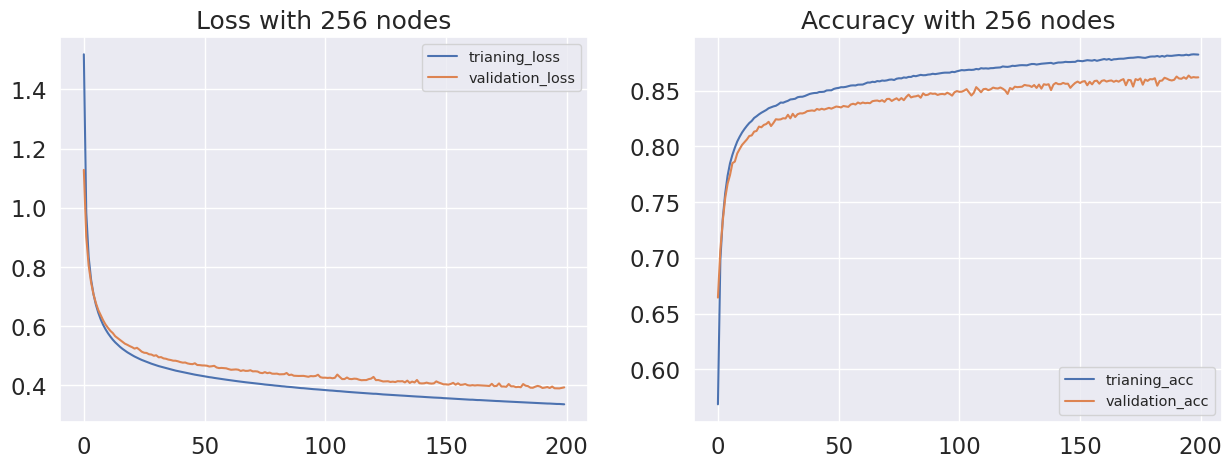

total used time for model training with 512 is 158.09387063980103s!
Best performance with 512 is 0.8679999709129333


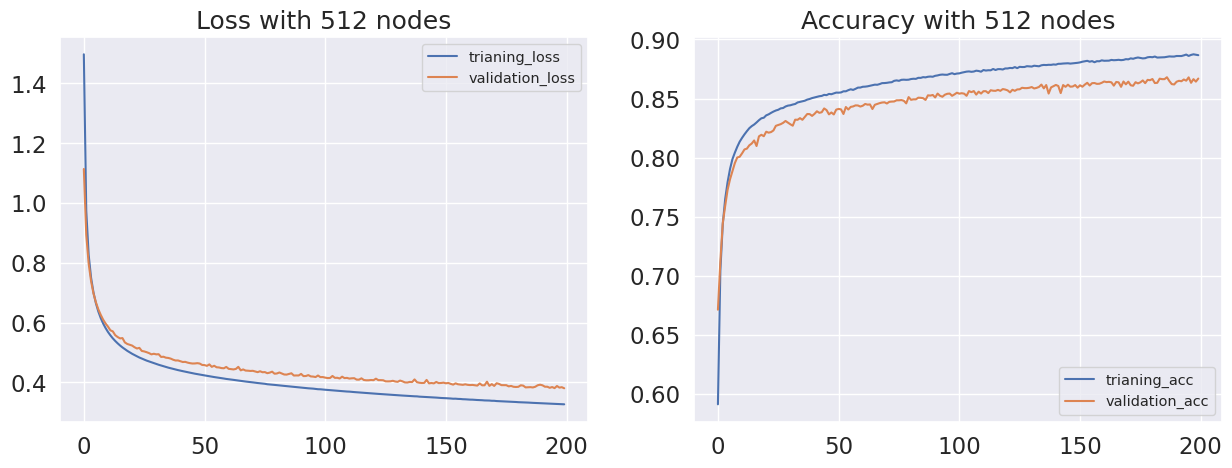

In [15]:
best_performance = -float('inf')
best_performance_nodes = 0

for n_nodes in [16, 32, 64, 128, 256, 512]:
    model = tf.keras.Sequential([
        Dense(units = n_nodes, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
    ])
    model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    start_time = time.time()
    history = model.fit(xtrain,
                    ytrain,
                    epochs = 200, 
                    batch_size = 512,
                    validation_data = (xtest, ytest),
                    verbose = 0)
    print(f'total used time for model training with {n_nodes} is {time.time() - start_time}s!')
    print(f"Best performance with {n_nodes} is {max(history.history['val_accuracy'])}")
    

    plt.figure(figsize = (15, 5))
    
    plt.subplot(1, 2, 1, title = f'Loss with {n_nodes} nodes')
    plt.plot(history.history['loss'], label = 'trianing_loss')
    plt.plot(history.history['val_loss'],label = 'validation_loss')
    plt.legend(loc = 'upper right', fontsize = 'xx-small')

    plt.subplot(1, 2, 2, title = f'Accuracy with {n_nodes} nodes')
    plt.plot(history.history['accuracy'], label = 'trianing_acc')
    plt.plot(history.history['val_accuracy'],label = 'validation_acc')
    plt.legend(loc = 'lower right', fontsize = 'xx-small')
    
    plt.show()

### 2.1.2 Findings

From the result above, we can see that the basic trend is with more hidden units, the perforce will improve. However, the training time will also increase. 
Also, with the number of nodes keeps increasing, the performance improvement is slowing down. Take examples when number of nodes is 128, 256, 512, the performance is almost the same but the training time increased a lot.

## 2.2 Hyper Parameters Tuning: Loss Function

### 2.2.1 Build Nodels

total used time for model training with categorical_crossentropy is 67.5524206161499s!
Best performance with categorical_crossentropy is 0.8629000186920166


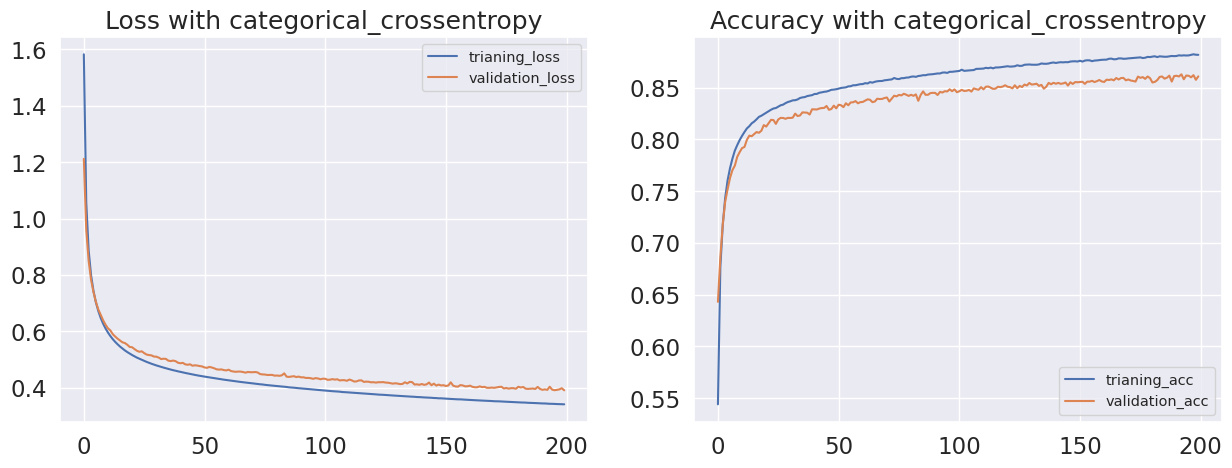

total used time for model training with KLDivergence is 68.43991374969482s!
Best performance with KLDivergence is 0.8626999855041504


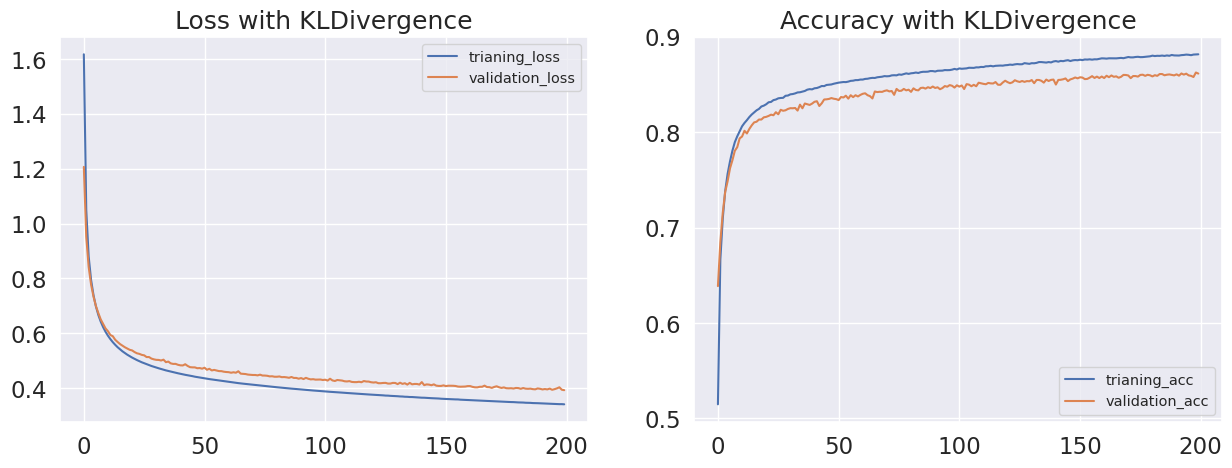

total used time for model training with SparseCategoricalCrossentropy is 66.64975619316101s!
Best performance with SparseCategoricalCrossentropy is 0.8615999817848206


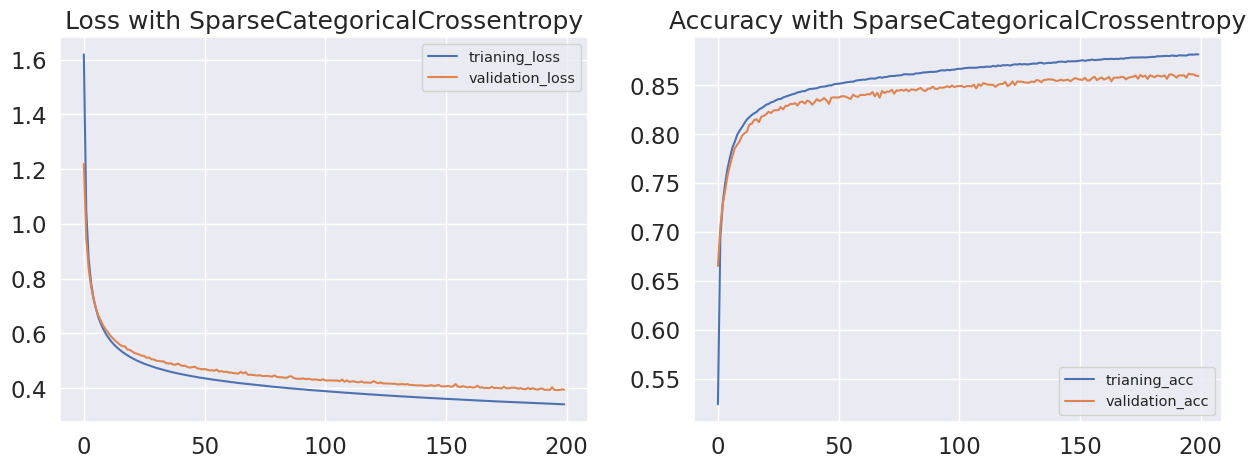

In [16]:
for loss_function in ['categorical_crossentropy', 'KLDivergence', 'SparseCategoricalCrossentropy']:
    ytrain_for_loss = y_train if loss_function == 'SparseCategoricalCrossentropy' else ytrain
    ytest_for_loss = y_test if loss_function == 'SparseCategoricalCrossentropy' else ytest
    model = tf.keras.Sequential([
        Dense(units = 128, activation = 'relu'),
        Dense(units = 10, activation = 'softmax')
    ])
    model.compile(optimizer = 'sgd', loss = loss_function, metrics = ['accuracy'])
    start_time = time.time()
    history = model.fit(xtrain,
                    ytrain_for_loss,
                    epochs = 200, 
                    batch_size = 512,
                    validation_data = (xtest, ytest_for_loss),
                    verbose = 0)
    print(f'total used time for model training with {loss_function} is {time.time() - start_time}s!')
    print(f"Best performance with {loss_function} is {max(history.history['val_accuracy'])}")
    

    plt.figure(figsize = (15, 5))
    
    plt.subplot(1, 2, 1, title = f'Loss with {loss_function}')
    plt.plot(history.history['loss'], label = 'trianing_loss')
    plt.plot(history.history['val_loss'],label = 'validation_loss')
    plt.legend(loc = 'upper right', fontsize = 'xx-small')

    plt.subplot(1, 2, 2, title = f'Accuracy with {loss_function}')
    plt.plot(history.history['accuracy'], label = 'trianing_acc')
    plt.plot(history.history['val_accuracy'],label = 'validation_acc')
    plt.legend(loc = 'lower right', fontsize = 'xx-small')
    
    plt.show()

### 2.2.2 Findings

From the above result, we can see that the training time and validation accuracy don't vary much among all three loss functions.
However, I think it is better to use spare_categorical_crossentropy as loss function as it does not requires labels to be one hot encoding. This can help save lots of memory where there are many classes.

## 2.3 Hyper Parameters Tuning: Activation Function

### 2.3.1 Build Models

total used time for model training with tanh is 67.47781491279602s!
Best performance with tanh is 0.857699990272522


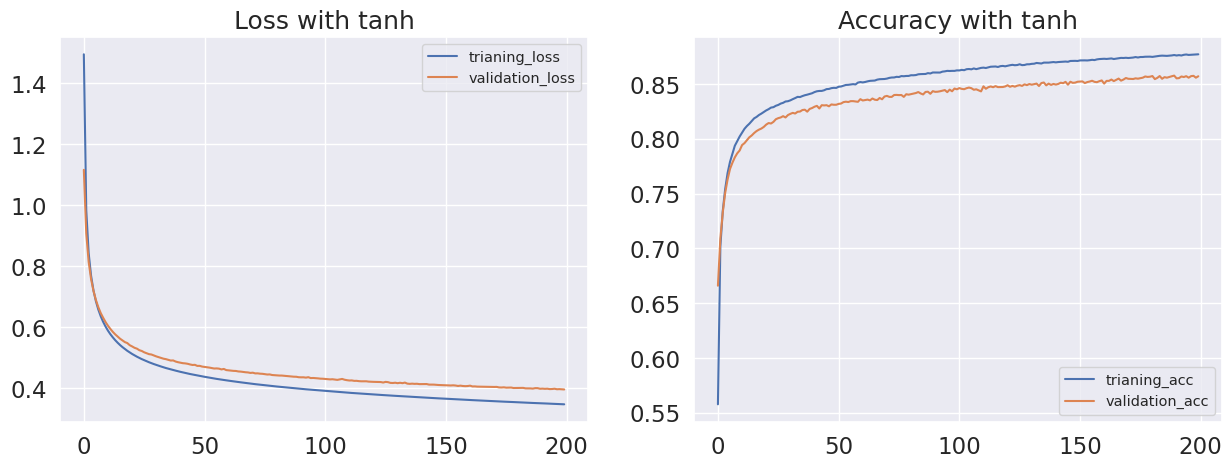

total used time for model training with sigmoid is 69.17820858955383s!
Best performance with sigmoid is 0.8269000053405762


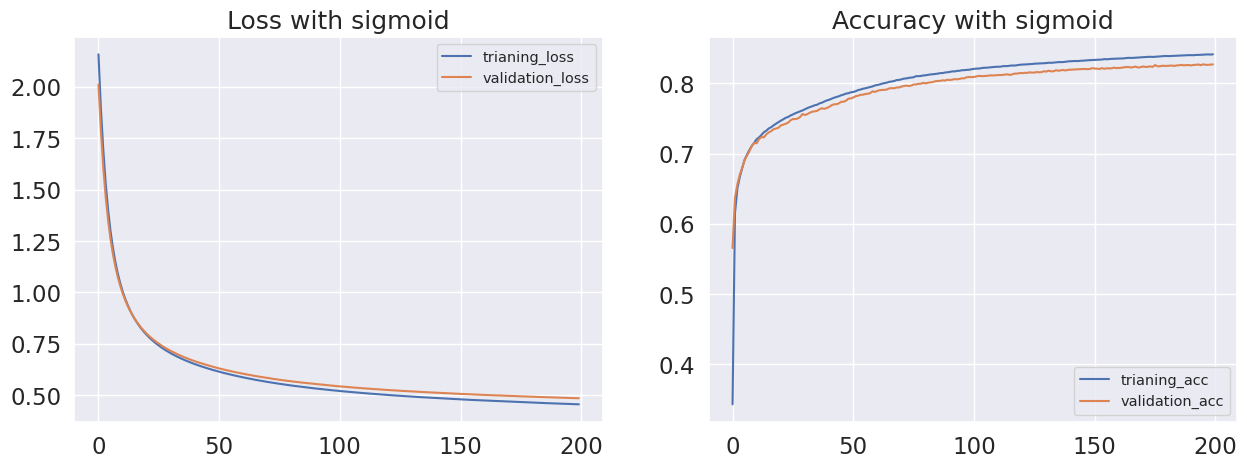

total used time for model training with relu is 67.77867817878723s!
Best performance with relu is 0.8626000285148621


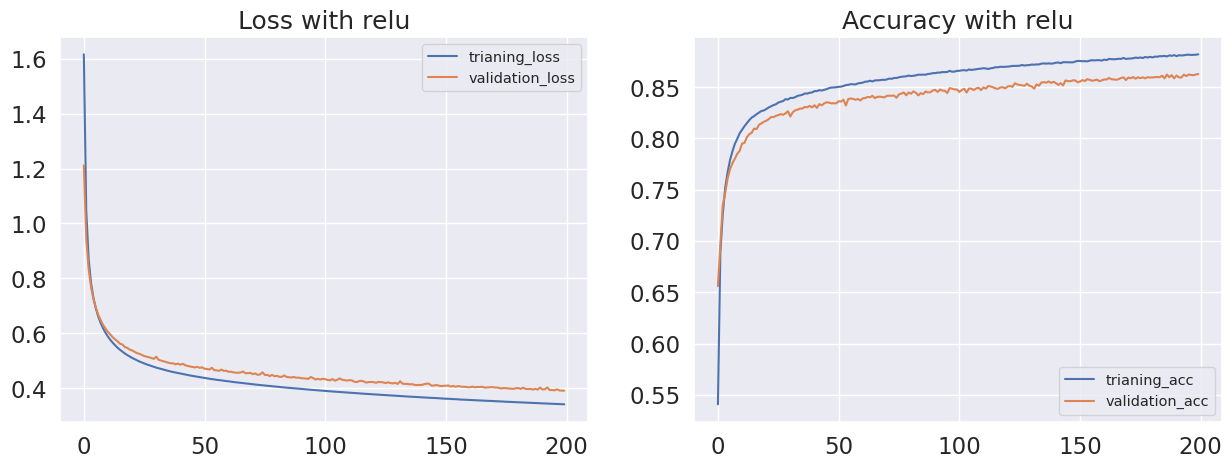

In [17]:
for activation_function in ['tanh', 'sigmoid', 'relu']:
    model = tf.keras.Sequential([
        Dense(units = 128, activation = activation_function),
        Dense(units = 10, activation = 'softmax')
    ])
    model.compile(optimizer = 'sgd', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
    start_time = time.time()
    history = model.fit(xtrain,
                    y_train,
                    epochs = 200, 
                    batch_size = 512,
                    validation_data = (xtest, y_test),
                    verbose = 0)
    print(f'total used time for model training with {activation_function} is {time.time() - start_time}s!')
    print(f"Best performance with {activation_function} is {max(history.history['val_accuracy'])}")
    

    plt.figure(figsize = (15, 5))
    
    plt.subplot(1, 2, 1, title = f'Loss with {activation_function}')
    plt.plot(history.history['loss'], label = 'trianing_loss')
    plt.plot(history.history['val_loss'],label = 'validation_loss')
    plt.legend(loc = 'upper right', fontsize = 'xx-small')

    plt.subplot(1, 2, 2, title = f'Accuracy with {activation_function}')
    plt.plot(history.history['accuracy'], label = 'trianing_acc')
    plt.plot(history.history['val_accuracy'],label = 'validation_acc')
    plt.legend(loc = 'lower right', fontsize = 'xx-small')
    
    plt.show()

### 2.3.2 Findings

From the above result, There is no much result for all three activation functions. One possible reason is that there is only one hidden layer in the network.
As Relu function is the most simple one to compute, We choose to use Relu as activation function.

# 3 Final Model

In [18]:
model = tf.keras.Sequential([
    Dense(units = 128, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = 'sgd', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(xtrain,
                   y_train,
                   epochs = 200,
                   batch_size = 512,
                   validation_data = (xtest, y_test),
                   verbose = 2)

Epoch 1/200
118/118 - 1s - loss: 1.5745 - accuracy: 0.5387 - val_loss: 1.1921 - val_accuracy: 0.6668 - 510ms/epoch - 4ms/step
Epoch 2/200
118/118 - 0s - loss: 1.0376 - accuracy: 0.6914 - val_loss: 0.9474 - val_accuracy: 0.7003 - 340ms/epoch - 3ms/step
Epoch 3/200
118/118 - 0s - loss: 0.8753 - accuracy: 0.7220 - val_loss: 0.8436 - val_accuracy: 0.7201 - 371ms/epoch - 3ms/step
Epoch 4/200
118/118 - 0s - loss: 0.7932 - accuracy: 0.7450 - val_loss: 0.7806 - val_accuracy: 0.7410 - 358ms/epoch - 3ms/step
Epoch 5/200
118/118 - 0s - loss: 0.7397 - accuracy: 0.7632 - val_loss: 0.7387 - val_accuracy: 0.7544 - 345ms/epoch - 3ms/step
Epoch 6/200
118/118 - 0s - loss: 0.7005 - accuracy: 0.7765 - val_loss: 0.7049 - val_accuracy: 0.7656 - 334ms/epoch - 3ms/step
Epoch 7/200
118/118 - 0s - loss: 0.6696 - accuracy: 0.7866 - val_loss: 0.6763 - val_accuracy: 0.7787 - 334ms/epoch - 3ms/step
Epoch 8/200
118/118 - 0s - loss: 0.6445 - accuracy: 0.7942 - val_loss: 0.6552 - val_accuracy: 0.7837 - 328ms/epoch - 3

Epoch 66/200
118/118 - 0s - loss: 0.4146 - accuracy: 0.8589 - val_loss: 0.4538 - val_accuracy: 0.8388 - 345ms/epoch - 3ms/step
Epoch 67/200
118/118 - 0s - loss: 0.4138 - accuracy: 0.8590 - val_loss: 0.4516 - val_accuracy: 0.8415 - 345ms/epoch - 3ms/step
Epoch 68/200
118/118 - 0s - loss: 0.4126 - accuracy: 0.8597 - val_loss: 0.4494 - val_accuracy: 0.8412 - 344ms/epoch - 3ms/step
Epoch 69/200
118/118 - 0s - loss: 0.4115 - accuracy: 0.8601 - val_loss: 0.4519 - val_accuracy: 0.8407 - 344ms/epoch - 3ms/step
Epoch 70/200
118/118 - 0s - loss: 0.4107 - accuracy: 0.8602 - val_loss: 0.4513 - val_accuracy: 0.8410 - 336ms/epoch - 3ms/step
Epoch 71/200
118/118 - 0s - loss: 0.4097 - accuracy: 0.8606 - val_loss: 0.4500 - val_accuracy: 0.8408 - 329ms/epoch - 3ms/step
Epoch 72/200
118/118 - 0s - loss: 0.4089 - accuracy: 0.8606 - val_loss: 0.4466 - val_accuracy: 0.8425 - 330ms/epoch - 3ms/step
Epoch 73/200
118/118 - 0s - loss: 0.4078 - accuracy: 0.8605 - val_loss: 0.4454 - val_accuracy: 0.8432 - 326ms/e

Epoch 131/200
118/118 - 0s - loss: 0.3671 - accuracy: 0.8741 - val_loss: 0.4119 - val_accuracy: 0.8535 - 329ms/epoch - 3ms/step
Epoch 132/200
118/118 - 0s - loss: 0.3667 - accuracy: 0.8744 - val_loss: 0.4129 - val_accuracy: 0.8525 - 327ms/epoch - 3ms/step
Epoch 133/200
118/118 - 0s - loss: 0.3663 - accuracy: 0.8743 - val_loss: 0.4106 - val_accuracy: 0.8544 - 328ms/epoch - 3ms/step
Epoch 134/200
118/118 - 0s - loss: 0.3658 - accuracy: 0.8752 - val_loss: 0.4135 - val_accuracy: 0.8521 - 326ms/epoch - 3ms/step
Epoch 135/200
118/118 - 0s - loss: 0.3651 - accuracy: 0.8747 - val_loss: 0.4119 - val_accuracy: 0.8527 - 330ms/epoch - 3ms/step
Epoch 136/200
118/118 - 0s - loss: 0.3646 - accuracy: 0.8749 - val_loss: 0.4128 - val_accuracy: 0.8535 - 327ms/epoch - 3ms/step
Epoch 137/200
118/118 - 0s - loss: 0.3642 - accuracy: 0.8754 - val_loss: 0.4107 - val_accuracy: 0.8543 - 329ms/epoch - 3ms/step
Epoch 138/200
118/118 - 0s - loss: 0.3637 - accuracy: 0.8753 - val_loss: 0.4140 - val_accuracy: 0.8519 -

118/118 - 0s - loss: 0.3393 - accuracy: 0.8838 - val_loss: 0.3918 - val_accuracy: 0.8611 - 331ms/epoch - 3ms/step
Epoch 196/200
118/118 - 0s - loss: 0.3388 - accuracy: 0.8834 - val_loss: 0.3923 - val_accuracy: 0.8601 - 326ms/epoch - 3ms/step
Epoch 197/200
118/118 - 0s - loss: 0.3386 - accuracy: 0.8837 - val_loss: 0.3903 - val_accuracy: 0.8635 - 327ms/epoch - 3ms/step
Epoch 198/200
118/118 - 0s - loss: 0.3380 - accuracy: 0.8841 - val_loss: 0.3893 - val_accuracy: 0.8631 - 327ms/epoch - 3ms/step
Epoch 199/200
118/118 - 0s - loss: 0.3376 - accuracy: 0.8839 - val_loss: 0.3907 - val_accuracy: 0.8617 - 351ms/epoch - 3ms/step
Epoch 200/200
118/118 - 0s - loss: 0.3373 - accuracy: 0.8843 - val_loss: 0.3906 - val_accuracy: 0.8613 - 345ms/epoch - 3ms/step


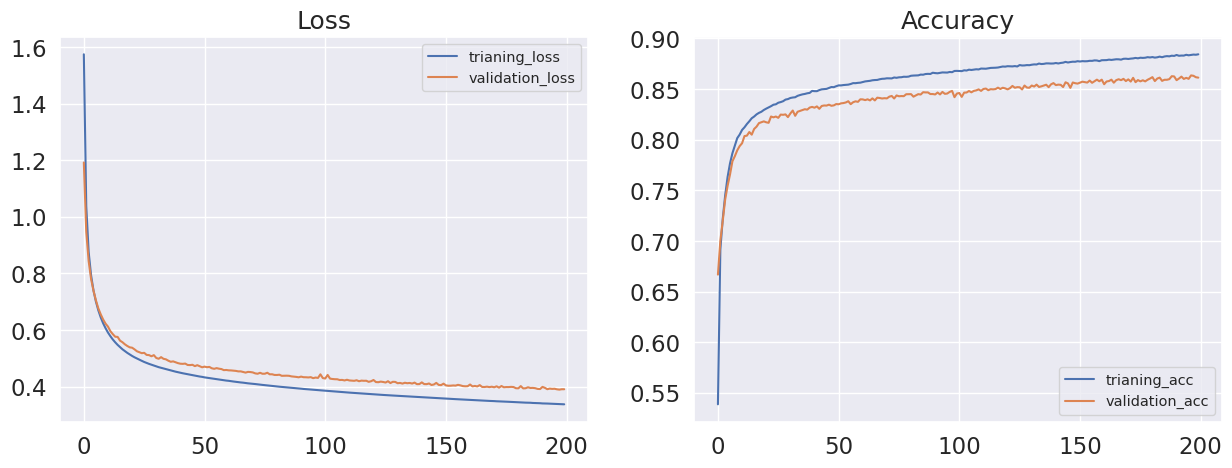

In [20]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1, title = 'Loss')
plt.plot(history.history['loss'], label = 'trianing_loss')
plt.plot(history.history['val_loss'],label = 'validation_loss')
plt.legend(loc = 'upper right', fontsize = 'xx-small')

plt.subplot(1, 2, 2, title = 'Accuracy')
plt.plot(history.history['accuracy'], label = 'trianing_acc')
plt.plot(history.history['val_accuracy'],label = 'validation_acc')
plt.legend(loc = 'lower right', fontsize = 'xx-small')

In [21]:
y_test_predict = model.predict(xtest)
print(classification_report(y_true=ytest.argmax(1), y_pred=y_test_predict.argmax(1)))

313/313 [==============================] - 0s 595us/step
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.80      0.77      1000
           3       0.85      0.87      0.86      1000
           4       0.80      0.73      0.76      1000
           5       0.95      0.94      0.95      1000
           6       0.67      0.65      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

